# United Kingdom road accident data analysis

## Introduction

# Data preparation

## Data characterisation

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
UK_Accident = pd.read_csv("UK_Accident.csv")

In [3]:
UK_Accident

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [4]:
UK_Accident.shape

(1504150, 33)

In [5]:
UK_Accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

## Data cleaning

In [6]:
UK_A = UK_Accident.drop(columns =["Unnamed: 0", "Accident_Index", "LSOA_of_Accident_Location", "Year", "Local_Authority_(Highway)", "1st_Road_Class", "1st_Road_Number", "2nd_Road_Class", "2nd_Road_Number", "Local_Authority_(District)"])

In [7]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,Single carriageway,30,None,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes


In [8]:
UK_A.isnull().sum()

Location_Easting_OSGR                          101
Location_Northing_OSGR                           0
Longitude                                      101
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           117
Road_Type                                        0
Speed_limit                                      0
Junction_Control                                 0
Pedestrian_Crossing-Human_Control               17
Pedestrian_Crossing-Physical_Facilities         34
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions                          0
Special_Conditions_at_Site     

In [9]:
UK_A = UK_A.dropna(axis=0)

In [10]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,Single carriageway,30,None,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes


In [11]:
#import pandas_profiling as pp
#pp.ProfileReport(UK_A)

## Data visualisation

[Text(0.5, 0, 'Days of the Week'),
 Text(0.5, 1.0, 'Accidents per day of the week')]

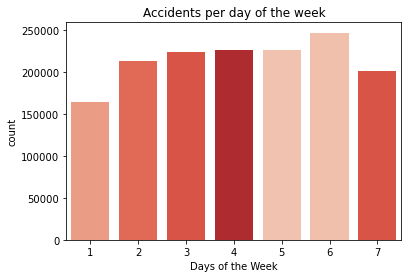

In [12]:
import seaborn as sns 
import matplotlib as plt
dev_color= UK_A.Day_of_Week.argsort().argsort()
pal= sns.color_palette('Reds', len(dev_color))
p = sns.countplot(x="Day_of_Week", 
              data=UK_A,
              palette=np.array(pal[::])[dev_color]) 
p.set(xlabel='Days of the Week', title= "Accidents per day of the week")


In [13]:
A = UK_A.assign(Area =pd.cut(UK_A['Urban_or_Rural_Area'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Urban', 'Rural', 'Unknow']),
               Severity =pd.cut(UK_A['Accident_Severity'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Fatal', 'Serious', 'Slight']) )

In [14]:
#from plotnine import ggplot, aes, geom_point, scale_colour_brewer, labs
#(
#ggplot(A)
#+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Area")
#+ geom_point()
#+ scale_colour_brewer(  type = "qual", palette = 6)
#+ labs(title ="Distribution of the UK road accidents by area",x = "Location Easting OSGR", y = "Location Northing OSGR")
#)

In [15]:
#(
#ggplot(A)
#+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Severity")
#+ geom_point()
#+ scale_colour_brewer(  type = "qual", palette = 6)
#+ labs(title ="Distribution of the UK road accidents by severity",x = "Location Easting OSGR", y = "Location Northing OSGR")
#)

## Feature engineering


In [16]:
UK_A['Date-Time'] = pd.to_datetime(UK_A['Date'] + UK_A['Time'], format='%d/%m/%Y%H:%M')

In [17]:
UK_A['Date-Time']

0         2005-01-04 17:42:00
1         2005-01-05 17:36:00
2         2005-01-06 00:15:00
3         2005-01-07 10:35:00
4         2005-01-10 21:13:00
                  ...        
1504145   2014-12-07 22:20:00
1504146   2014-12-11 06:40:00
1504147   2014-12-09 02:00:00
1504148   2014-12-17 06:55:00
1504149   2014-12-24 15:00:00
Name: Date-Time, Length: 1503890, dtype: datetime64[ns]

In [18]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Date-Time
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,Single carriageway,30,None,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005-01-04 17:42:00
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-05 17:36:00
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-06 00:15:00
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005-01-07 10:35:00
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005-01-10 21:13:00


In [19]:
UK_A = UK_A.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'], axis=1)

In [20]:
UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Date-Time
0,1,2,1,1,04/01/2005,3,17:42,Single carriageway,30,None,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005-01-04 17:42:00
1,1,3,1,1,05/01/2005,4,17:36,Dual carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-05 17:36:00
2,1,3,2,1,06/01/2005,5,00:15,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-06 00:15:00
3,1,3,1,1,07/01/2005,6,10:35,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005-01-07 10:35:00
4,1,3,1,1,10/01/2005,2,21:13,Single carriageway,30,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005-01-10 21:13:00


In [21]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder( handle_unknown='error', sparse=True)

In [22]:
#encoder_df = pd.DataFrame(encoder.fit_transform(UK_A[["Weather_Conditions"]]).toarray())

In [23]:
#final_df = UK_A.join(encoder_df)
#encoder_df.shape

In [24]:
#final_df.shape

In [25]:
#final_df.isnull().sum()

https://towardsdatascience.com/label-encoder-and-onehot-encoder-in-python-83d32288b592

In [26]:
UK_A['Speed_limit'].unique()

array([30, 40, 50, 20, 60, 70, 10, 15], dtype=int64)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
UK_A['Speed_limit'] = le.fit_transform(UK_A['Speed_limit'])

UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Date-Time
0,1,2,1,1,04/01/2005,3,17:42,Single carriageway,3,None,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005-01-04 17:42:00
1,1,3,1,1,05/01/2005,4,17:36,Dual carriageway,3,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-05 17:36:00
2,1,3,2,1,06/01/2005,5,00:15,Single carriageway,3,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005-01-06 00:15:00
3,1,3,1,1,07/01/2005,6,10:35,Single carriageway,3,None,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005-01-07 10:35:00
4,1,3,1,1,10/01/2005,2,21:13,Single carriageway,3,None,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005-01-10 21:13:00


In [28]:
UK_A['Junction_Control'].unique()

array(['None', 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

In [29]:
UK_A['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [30]:
data = pd.get_dummies (UK_A, columns=['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
                                     'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions',
                                     'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                     'Did_Police_Officer_Attend_Scene_of_Accident'], drop_first= True )
data

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Speed_limit,Urban_or_Rural_Area,Date-Time,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_None,Junction_Control_Stop Sign,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,...,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,1,2,1,1,04/01/2005,3,17:42,3,1,2005-01-04 17:42:00,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1,3,1,1,05/01/2005,4,17:36,3,1,2005-01-05 17:36:00,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,3,2,1,06/01/2005,5,00:15,3,1,2005-01-06 00:15:00,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1,3,1,1,07/01/2005,6,10:35,3,1,2005-01-07 10:35:00,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,1,3,1,1,10/01/2005,2,21:13,3,1,2005-01-10 21:13:00,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,07/12/2014,1,22:20,7,2,2014-12-07 22:20:00,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504146,98,3,2,2,11/12/2014,5,06:40,7,2,2014-12-11 06:40:00,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504147,98,3,1,1,09/12/2014,3,02:00,4,2,2014-12-09 02:00:00,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504148,98,2,3,2,17/12/2014,4,06:55,6,2,2014-12-17 06:55:00,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


https://medium.com/analytics-vidhya/categorical-encoding-with-pandas-get-dummies-d6f1ae6a3e06

## Data scaling

# Linear Discriminant Analysis

# Machine Learning

## Time series analysis

## Regression analysis

# Results and Discussion

# Conclusion

# References